In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np

In [14]:
files_OM4 = '/scratch/db194/OM4/test_OM4_SIS2/zip/output/19*.ocean_daily_*.nc'
ds_daily = xr.open_mfdataset(files_OM4)
#files_OM4 = '/scratch/db194/OM4/test_OM4_SIS2/zip/197*.ocean_daily_*.nc'
#files_OM4 = '/scratch/db194/OM4/test_OM4_SIS2/zip/19780101.ocean_daily_00721605.nc'

In [19]:
files_surf_OM4 = '/scratch/db194/OM4/test_OM4_SIS2/zip/output/19*.ocean_month_0*.nc'
ds_month = xr.open_mfdataset(files_surf_OM4)

In [8]:
ds_stats = xr.open_dataset('/scratch/db194/OM4/test_OM4_SIS2/zip/output/ocean.stats.nc')

In [28]:
ds_daily

<xarray.Dataset>
Dimensions:     (xq: 1440, yh: 1080, time: 1825, nv: 2, xh: 1440, yq: 1080)
Coordinates:
  * xq          (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time        (time) object 1977-01-01 12:00:00 ... 1981-12-31 12:00:00
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yq          (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    ssu         (time, yh, xq) float32 dask.array<chunksize=(31, 1080, 1440), meta=np.ndarray>
    ssv         (time, yq, xh) float32 dask.array<chunksize=(31, 1080, 1440), meta=np.ndarray>
    zos         (time, yh, xh) float32 dask.array<chunksize=(31, 1080, 1440), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    time_bnds   (time, nv) timedelta64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
Attributes:
    filename:   19770101.ocean_daily_00721240.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

In [10]:
ds_stats

<xarray.Dataset>
Dimensions:        (Layer: 75, Interface: 76, Time: 7305)
Coordinates:
  * Layer          (Layer) float64 1.0 3.0 5.0 ... 3.338e+03 3.591e+03 5.111e+03
  * Interface      (Interface) float64 0.0 2.0 4.0 ... 3.722e+03 6.5e+03
  * Time           (Time) timedelta64[ns] 80728 days 01:16:18.871345152 ... 8...
Data variables: (12/18)
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    ...             ...
    Salt_chg       (Time) float64 ...
    Salt_anom      (Time) float64 ...
    Heat           (Time) float64 ...
    Heat_chg       (Time) float64 ...
    Heat_anom      (Time) float64 ...
    age            (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc

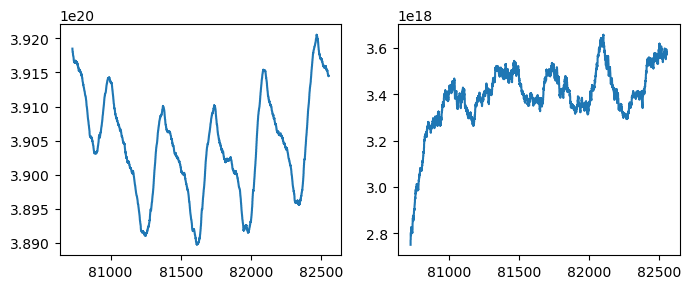

In [12]:
plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(ds_stats.Time/1e9/24/3600, ds_stats.APE.sum('Interface'))

plt.subplot(122)
plt.plot(ds_stats.Time/1e9/24/3600, ds_stats.KE.sum('Layer'))

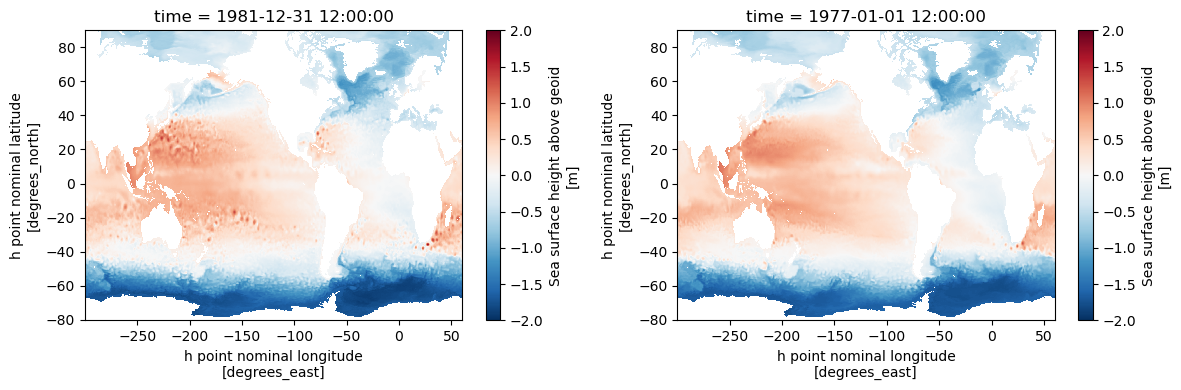

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ds.zos.isel(time=-1).plot(vmin=-2)

plt.subplot(122)
ds.zos.isel(time=0).plot(vmin=-2)

plt.tight_layout()

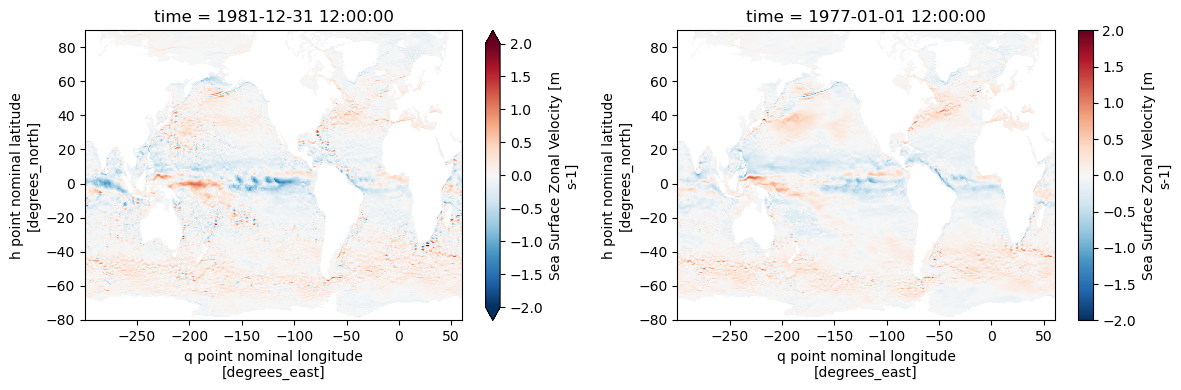

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ds.ssu.isel(time=-1).plot(vmin=-2)

plt.subplot(122)
ds.ssu.isel(time=0).plot(vmin=-2)

plt.tight_layout()

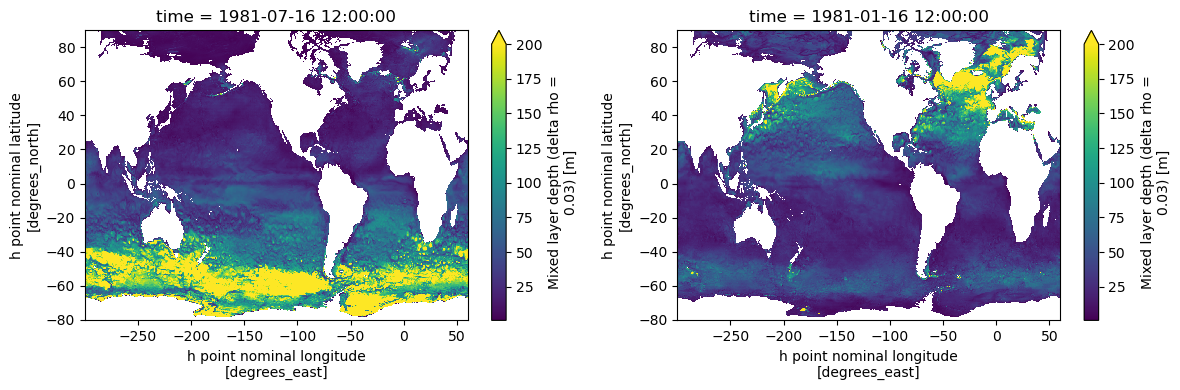

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ds_month.MLD_003.isel(time=-6).plot(vmax=200)

plt.subplot(122)
ds_month.MLD_003.isel(time=-12).plot(vmax=200)

plt.tight_layout()